[*********************100%***********************]  1 of 1 completed


Mean Squared Error: 17478.01071999359


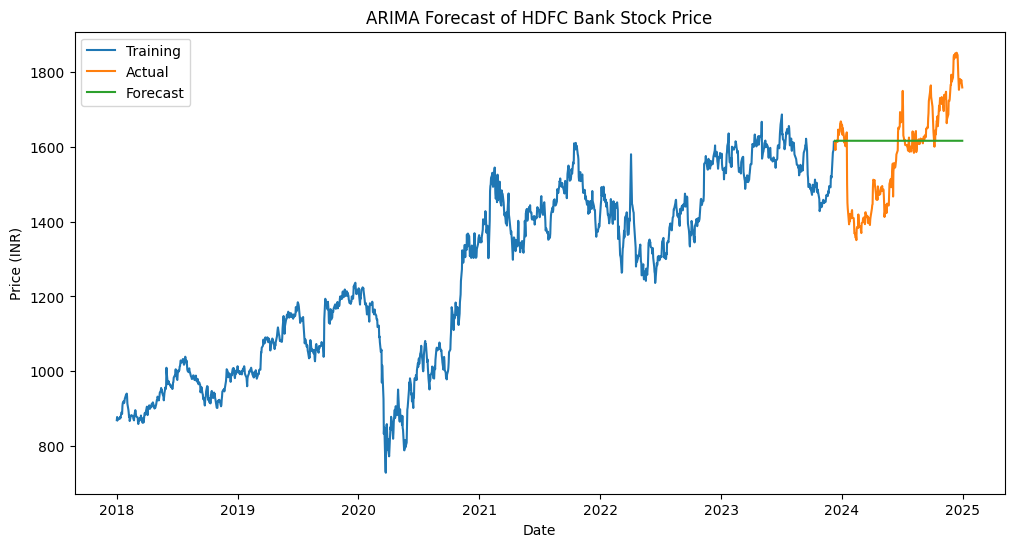

In [1]:
# 📌 Step 1: Import Libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

# 📌 Step 2: Download Stock Data
ticker = 'HDFCBANK.NS'
df = yf.download(ticker, start='2018-01-01', end='2024-12-31')
df = df[['Close']]
df = df.dropna()

# 📌 Step 3: Split data (Train/Test)
train_size = int(len(df) * 0.85)
train, test = df[:train_size], df[train_size:]

# 📌 Step 4: Train ARIMA Model
model = ARIMA(train, order=(5, 1, 0))  # ARIMA(p,d,q)
fitted_model = model.fit()

# 📌 Step 5: Forecast
forecast = fitted_model.forecast(steps=len(test))
forecast.index = test.index

# 📌 Step 6: Evaluation
mse = mean_squared_error(test, forecast)
print("Mean Squared Error:", mse)

# 📌 Step 7: Plot Results
plt.figure(figsize=(12, 6))
plt.plot(train, label='Training')
plt.plot(test, label='Actual')
plt.plot(forecast, label='Forecast')
plt.title('ARIMA Forecast of HDFC Bank Stock Price')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.savefig('images/arima_forecast_plot.png')
plt.show()

# 📌 Step 8: Save Data
df.to_csv('data/hdfc_stock_data.csv')
